In [55]:
# Importación de librerías
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sktime.forecasting.base import ForecastingHorizon
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.ets import AutoETS
from sktime.forecasting.arima import AutoARIMA
from sktime.transformations.series.boxcox import LogTransformer
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import MeanSquaredError
from sktime.forecasting.tbats import TBATS

from darts import TimeSeries
from darts.models import Theta, FourTheta
from darts.metrics import mape
from darts.utils.utils import SeasonalityMode, TrendMode, ModelMode
from darts.models import TBATS

import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('StackOverflow.csv')

In [3]:
data['Fecha'] = pd.to_datetime(data['month'],format="%y-%b")
data.set_index('Fecha', inplace = True)
data.drop('month', axis=1, inplace=True)
data.head()


,nltk,spacy,stanford-nlp,python,r,numpy,scipy,matlab,machine-learning,pandas,...,Plato,Sympy,Flair,stanford-nlp.1,pyqt,Nolearn,Lasagne,OCR,Apache-spark-mlib,azure-virtual-machine
Fecha,,,,,,,,,,,,,,,,,,,,,
2009-01-01,0,0,0,631,8,6,2,19,8,0,...,0,1,0,0,5,0,0,5,0,0
2009-02-01,1,0,0,633,9,7,3,27,4,0,...,0,0,0,0,5,0,0,11,0,0
2009-03-01,0,0,0,766,4,4,2,24,3,0,...,0,0,0,0,7,0,0,2,0,0
2009-04-01,0,0,0,768,12,6,3,32,10,0,...,0,0,0,0,11,0,0,5,0,0
2009-05-01,1,0,0,1003,2,7,2,42,7,0,...,0,0,0,0,10,0,0,3,0,0


In [4]:
data_matlab = data['matlab']
data_matlab = pd.DataFrame(data_matlab)
data_matlab = data_matlab.sort_index().dropna()
data_matlab

,matlab
Fecha,
2009-01-01,19
2009-02-01,27
2009-03-01,24
2009-04-01,32
2009-05-01,42
...,...
2019-08-01,371
2019-09-01,362
2019-10-01,523


In [5]:
data_matlab.diff()

,matlab
Fecha,
2009-01-01,NaN
2009-02-01,8.0
2009-03-01,-3.0
2009-04-01,8.0
2009-05-01,10.0
...,...
2019-08-01,-15.0
2019-09-01,-9.0
2019-10-01,161.0


In [6]:
data_matlab.resample("m").median().diff()

,matlab
Fecha,
2009-01-31,NaN
2009-02-28,8.0
2009-03-31,-3.0
2009-04-30,8.0
2009-05-31,10.0
...,...
2019-08-31,-15.0
2019-09-30,-9.0
2019-10-31,161.0


Text(0, 0.5, 'Preguntas')

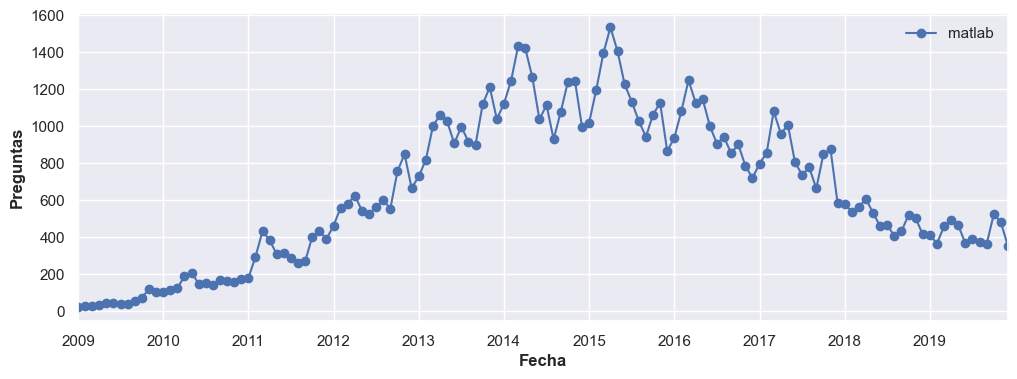

In [7]:
sns.set(rc={'figure.figsize':(12, 4)})
ax = data_matlab.plot(marker='o', linestyle='-')
ax.set_ylabel('Preguntas')

In [8]:
# ax = plt.gca()
# sm.graphics.tsa.quarter_plot(data_matlab['matlab'],ax=ax)
# ax.set_title('Comportamiento Estacional')

# ETS

In [26]:
matlab_ts=data_matlab.resample("q").last()
matlab_ts_q=matlab_ts['matlab'].astype('float64').to_period('Q').sort_index()


99 33


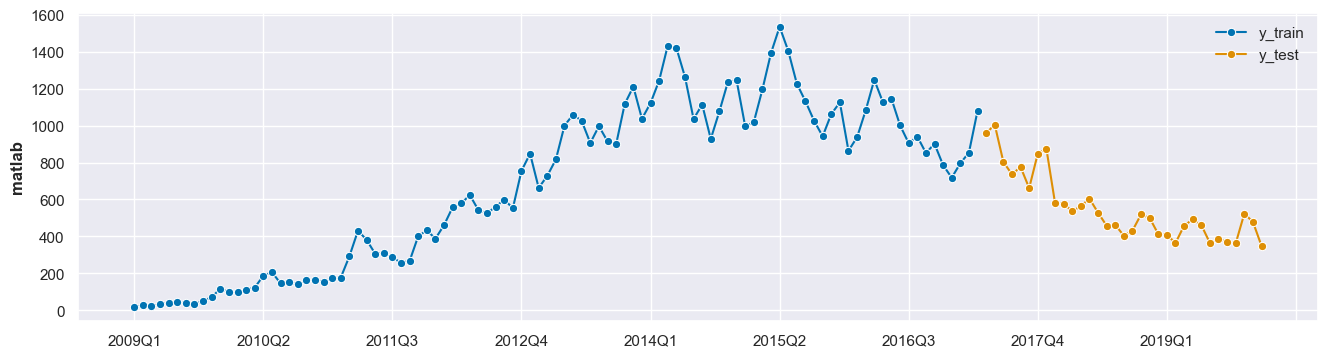

In [10]:
y_train, y_test = temporal_train_test_split(y = data_matlab['matlab'].astype('float64').to_period('Q'), test_size=0.25)
plot_series(y_train, y_test, labels=["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])

NO ME FUNCIONA - TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

In [11]:
# # step 2: specifying forecasting horizon
fh = np.arange(1, 4)

# # step 3: specifying the forecasting algorithm
matlab_auto_model = AutoETS(auto=True, sp=4, n_jobs=-1)
# matlab_auto_model.fit(y_train)


In [12]:
transformer = LogTransformer()
log_matlab_ts= transformer.fit_transform(matlab_ts_q)
log_matlab_ts.tail()

Fecha
2018Q4    6.023448
2019Q1    6.126869
2019Q2    5.899897
2019Q3    5.891644
2019Q4    5.855072
Freq: Q-DEC, Name: matlab, dtype: float64

# ARIMA

124 8


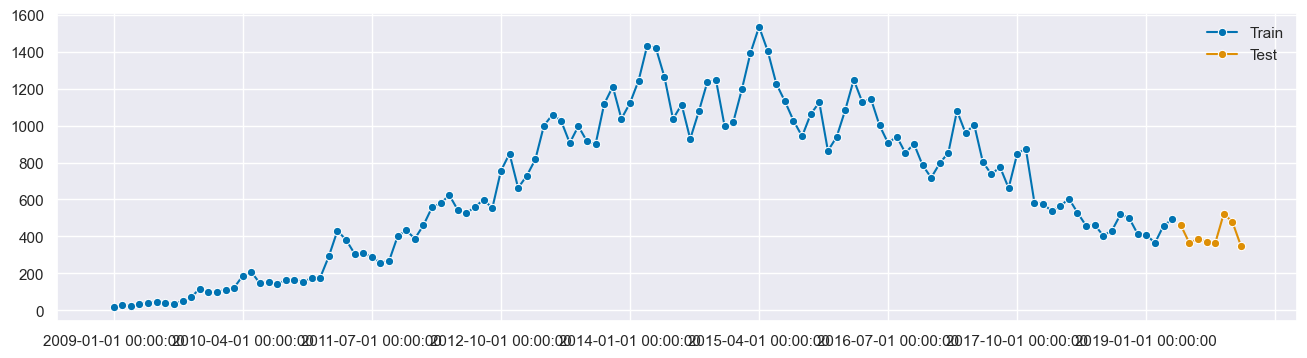

In [13]:
# Train y test
y_train, y_test = temporal_train_test_split(y =data_matlab, test_size=8)
log_y_train, log_y_test = temporal_train_test_split(y =log_matlab_ts, test_size=8)
plot_series(y_train, y_test, labels=["Train", "Test"])
# Time Series Size
print(y_train.shape[0], y_test.shape[0])

In [14]:
# Forecast Horizon
fh = np.arange(len(y_test)) + 1  # forecasting horizon

In [15]:
forecaster = AutoARIMA(sp=4,suppress_warnings=True)
forecaster.fit(log_y_train)

AutoARIMA(sp=4, suppress_warnings=True)

In [16]:
print(forecaster.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                   36
Model:             SARIMAX(0, 1, 2)x(0, 1, 2, 4)   Log Likelihood                   9.008
Date:                           Mon, 06 Nov 2023   AIC                             -6.017
Time:                                   11:37:08   BIC                              2.587
Sample:                               03-31-2009   HQIC                            -3.212
                                    - 12-31-2017                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0534      0.016     -3.434      0.001      -0.084      -0.023
ma.L1         -0.9197      0.161     -5.716

In [17]:
# Predicción Auto ARIMA 
log_y_pred = forecaster.predict(fh)
log_y_pred

2018Q1    6.597599
2018Q2    6.277298
2018Q3    5.963498
2018Q4    5.847979
2019Q1    5.924251
2019Q2    5.543167
2019Q3    5.174990
2019Q4    5.001988
Freq: Q-DEC, Name: matlab, dtype: float64

In [18]:
# Auto ARIMA Forecast
# Original (Invert log transformation)
np.exp(log_y_pred)

2018Q1    733.332586
2018Q2    532.348466
2018Q3    388.968310
2018Q4    346.533292
2019Q1    373.998112
2019Q2    255.485878
2019Q3    176.794769
2019Q4    148.708502
Freq: Q-DEC, Name: matlab, dtype: float64

In [19]:
# MAPE + MAPE Orignal Time Serie
mean_absolute_percentage_error(log_y_test, log_y_pred), mean_absolute_percentage_error(y_test, np.exp(log_y_pred))

(0.059150886119927096, 0.35860997994547583)

In [20]:
#Mean Squared Error + RMSE Original Time Serie
rmse = MeanSquaredError(square_root=True)
rmse(log_y_test, log_y_pred) , rmse(y_test, np.exp(log_y_pred))

(0.43924205083530365, 195.38000082701006)

In [21]:
# Forecast Accuracy Plot
# Predicciones y datos pasados
# plot_series(y_train, log_y_pred,y_test, labels=["Preguntas", "Predicción", "Real"])

In [22]:
#plot_series(y_train, logo_y_pred,y_test, labels=["Preguntas", "Predicción", "Real"])

# 4Theta

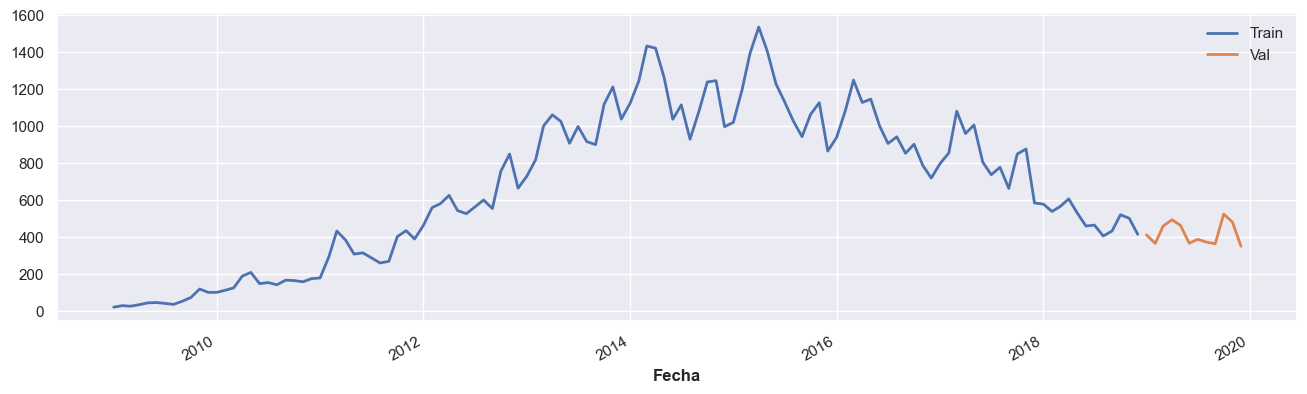

In [30]:
series = TimeSeries.from_dataframe(data_matlab)
train, val = series.split_before(pd.Timestamp("20190101"))
plt.figure(figsize=(16, 4))
train.plot(label="Train")
val.plot(label="Val")

In [31]:
model =Theta(seasonality_period=12) # Supone Theta 2
model.fit(train)
forecast = model.predict(len(val))
print("model {} obtains MAPE: {:.2f}%".format(model, mape(val, forecast)))

model Theta(seasonality_period=12) obtains MAPE: 119.55%


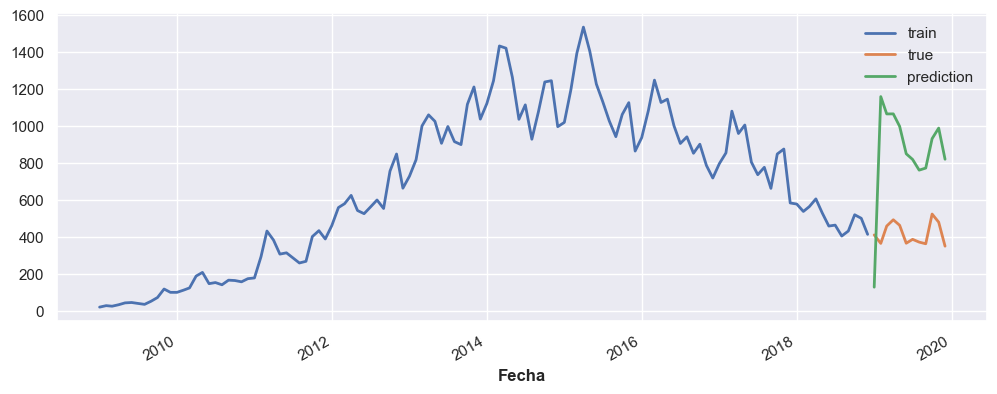

In [32]:
train.plot(label="train")
val.plot(label="true")
forecast.plot(label="prediction")

Buscaremos el mejor parámetro para Theta

In [33]:
# Intentaremos sacarlo probando 50 valores diferentes
thetas = 2- np.linspace(-10, 10, 50)

best_mape = float("inf")
best_theta = 0

for theta in thetas:

    model = Theta(theta)
    model.fit(train)
    pred_theta = model.predict(len(val))
    res = mape(val, pred_theta)

    if res < best_mape:
        best_mape = res
        best_theta = theta


In [35]:
thetas, best_theta

(array([12.        , 11.59183673, 11.18367347, 10.7755102 , 10.36734694,
         9.95918367,  9.55102041,  9.14285714,  8.73469388,  8.32653061,
         7.91836735,  7.51020408,  7.10204082,  6.69387755,  6.28571429,
         5.87755102,  5.46938776,  5.06122449,  4.65306122,  4.24489796,
         3.83673469,  3.42857143,  3.02040816,  2.6122449 ,  2.20408163,
         1.79591837,  1.3877551 ,  0.97959184,  0.57142857,  0.16326531,
        -0.24489796, -0.65306122, -1.06122449, -1.46938776, -1.87755102,
        -2.28571429, -2.69387755, -3.10204082, -3.51020408, -3.91836735,
        -4.32653061, -4.73469388, -5.14285714, -5.55102041, -5.95918367,
        -6.36734694, -6.7755102 , -7.18367347, -7.59183673, -8.        ]),
 0.5714285714285712)

The MAPE is: 72.77, with theta = 0.5714285714285712.


OrderedDict([('theta', 0.5714285714285712),
             ('seasonality_period', 12),
             ('season_mode',
              <SeasonalityMode.MULTIPLICATIVE: 'multiplicative'>)])

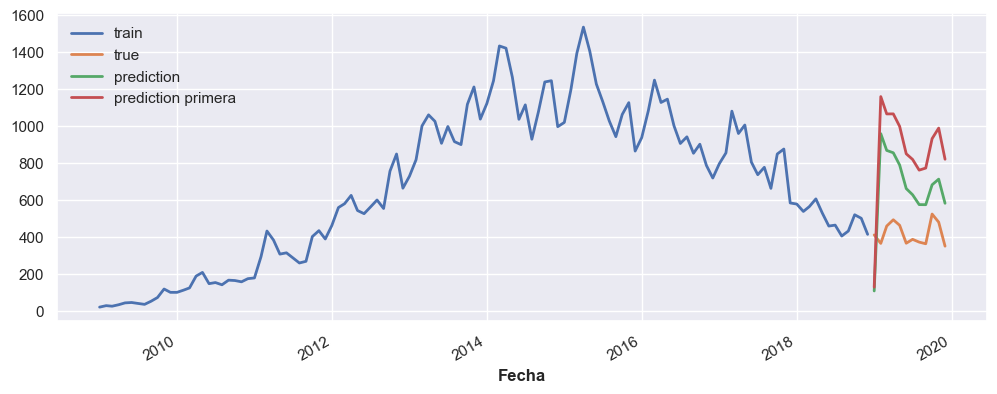

In [40]:
# Y sacaremos el modelo con el mejor valor Theta
best_theta_model = Theta(best_theta, seasonality_period=12)
best_theta_model.fit(train)
pred_best_theta = best_theta_model.predict(len(val))

print(
    "The MAPE is: {:.2f}, with theta = {}.".format(
        mape(val, pred_best_theta), best_theta
    )
)

train.plot(label="train")
val.plot(label="true")
pred_best_theta.plot(label="prediction")
forecast.plot(label="prediction primera")

best_theta_model.model_params

In [41]:
model =FourTheta(seasonality_period=12)
model.fit(train)
forecast = model.predict(len(val))
print("model {} obtains MAPE: {:.2f}%".format(model, mape(val, forecast)))

model FourTheta(seasonality_period=12) obtains MAPE: 125.49%


  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additiv

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additiv

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additiv

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additiv

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additiv

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additiv

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additiv

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additiv

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additiv

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additiv

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additiv

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additiv

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additiv

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additiv

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additiv

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additive model
Negative Theta line. Fallback to additiv

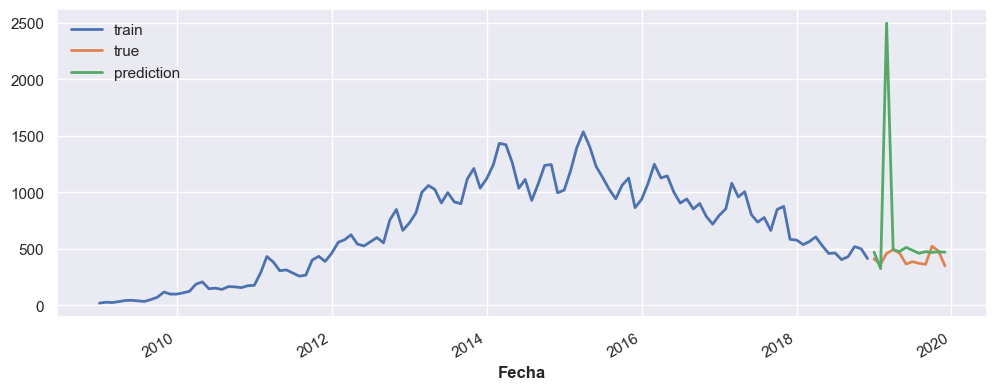

In [48]:
theta_grid = {
    #'theta':2- np.linspace(-10, 10, 10),
    'theta':[-4,-3,-2,-1,1,2,3,4],
    'model_mode': [ModelMode.ADDITIVE,ModelMode.MULTIPLICATIVE],
    'season_mode': [SeasonalityMode.MULTIPLICATIVE,SeasonalityMode.ADDITIVE],
    'trend_mode': [TrendMode.EXPONENTIAL,TrendMode.LINEAR]
}

best_grid_model=FourTheta.gridsearch(parameters=theta_grid,
                                series=train,
                                forecast_horizon=36, # 12
                                start=0.5,
                                last_points_only=False,
                                metric=mape,
                                reduction=np.mean,
                                verbose=True,
                                n_jobs=1)

best_grid_model



model FourTheta(theta=1) obtains MAPE: 53.47%


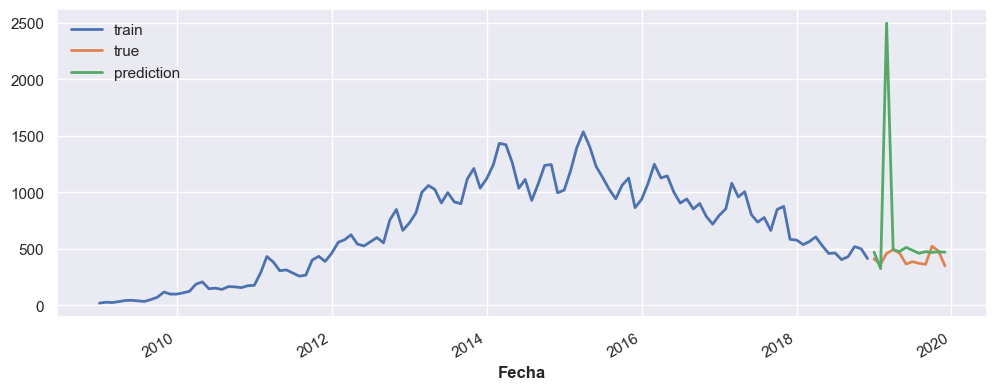

In [50]:
modelo=FourTheta(theta=best_grid_model[1]['theta'],
                 model_mode=ModelMode.ADDITIVE,
                 season_mode=SeasonalityMode.MULTIPLICATIVE,
                 trend_mode=TrendMode.LINEAR
                 )
modelo.fit(train)
pred_modelo = modelo.predict(len(val))

train.plot(label="train")
val.plot(label="true")
pred_modelo.plot(label="prediction")

print("model {} obtains MAPE: {:.2f}%".format(modelo, mape(val, pred_modelo)))

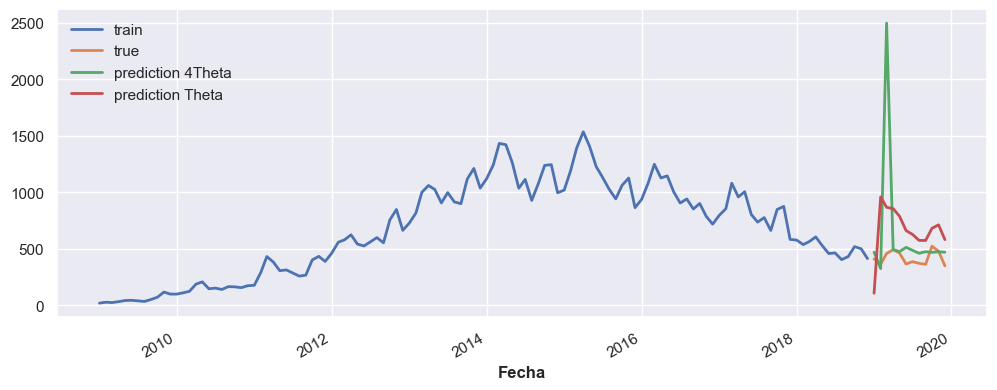

In [51]:
train.plot(label="train")
val.plot(label="true")
pred_modelo.plot(label="prediction 4Theta")
pred_best_theta.plot(label="prediction Theta")

# TBATS

In [53]:

from darts.metrics import mape

model =TBATS(
use_box_cox=None,
box_cox_bounds=(0, 1),
use_trend=None,
use_damped_trend=None,
seasonal_periods="freq",
use_arma_errors=True,
show_warnings=False,
multiprocessing_start_method='spawn',
random_state=0)
model.fit(train)
forecast = model.predict(len(val))
print("model {} obtains MAPE: {:.2f}%".format(model, mape(val, forecast)))

model TBATS() obtains MAPE: 13.26%


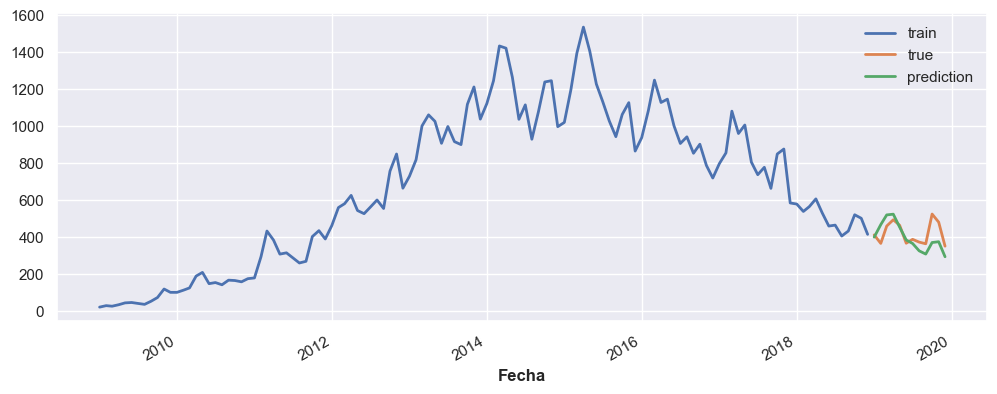

In [54]:
train.plot(label="train")
val.plot(label="true")
forecast.plot(label="prediction")

120 12


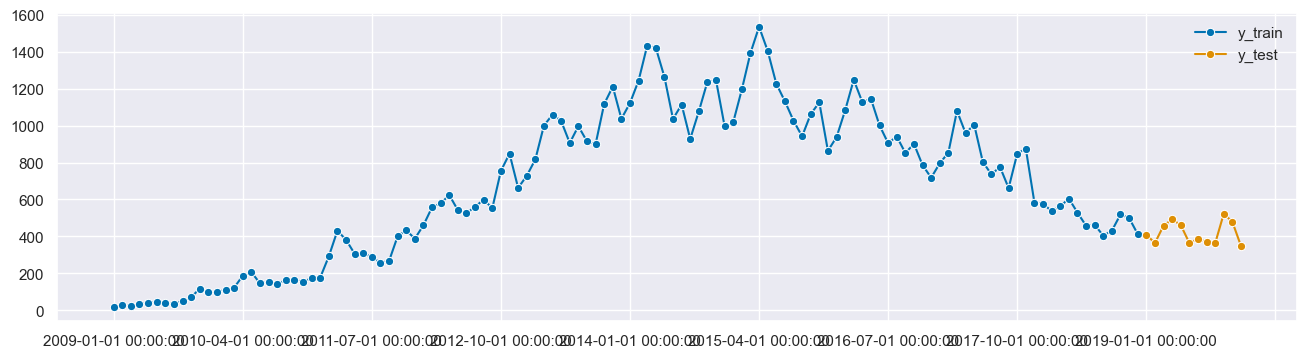

In [58]:
y_train, y_test = temporal_train_test_split(y = data_matlab , test_size=12)
# we will try to forecast y_test from y_train
# plotting for illustration
plot_series(y_train, y_test, labels=["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])